<h3 style="text-align: center;"><b>«Практическое занятие по доверительным интервалам»</b></h3>

In [10]:
!pip install pandas

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

try:
    import scipy.stats as st
except ImportError:
    !pip install scipy.stats
    import scipy.stats as st

## Расчет по формуле

<b>Пример.</b> По данным $7$ измерений некоторой величины найдены средняя результатов
измерений, равная $30$ и выборочная дисперсия, равная $36$. Найдите границы, в которых с
надежностью $0,95$ заключено истинное значение измеряемой величины. 

In [2]:
n = 7 # Размер выборки
dof = n - 1 # Число степеней свободы 
mn = 30 # Среднее значение
sigma = np.sqrt(36) # Стандартное отклонение
T = 2.45  # Параметр t распределения. Таблицу значений можно легко найти в поисковике

In [3]:
(mn - T*sigma/np.sqrt(n), mn + T*sigma/np.sqrt(n))

(24.44392224676436, 35.55607775323564)

## Собственная функция

Вспомогательная функция для подсчета доверительного интервала для маленьких выборок (до 30 элементов, t распределение).

In [4]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n-1)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [5]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))
print(mean_confidence_interval(a, 0.99))

(11.707199792530355, 12.391304347826088, 13.07540890312182)
(11.02260721314349, 12.391304347826088, 13.760001482508686)
(10.1445373309875, 12.391304347826088, 14.638071364664675)


<b>Пример.</b> Попробуем с помощью доверительного интервала оценить результаты выборов.

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>

In [6]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',') # Откроем датасет

In [7]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df.head()

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6


Среднее по всей выборке: 44.079


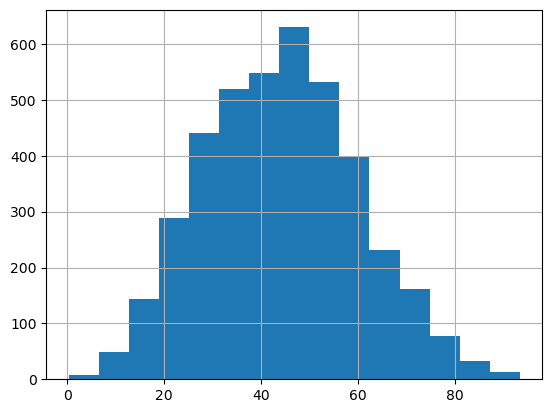

In [8]:
df['%'].hist(bins=15)
print(f"Среднее по всей выборке: {df['%'].mean():.3f}")

In [9]:
some_states = ['AK','OH','WV','ME','CA','MD']

sub_df = df.loc[df['State Postal'].isin(some_states)]  # Выборка по нескольким штатам

l, s, r=mean_confidence_interval(sub_df['%'], 0.99)
l, s, r

(47.33158966272541, 48.45610425240053, 49.580618842075644)

## Встроенные функции scipy.stats

### Расчет с использованием нормального распределения

Длина выборки более 30 элементов.

<b>Пример.</b> Используем выборку размером $n=100$ и определим $90\%$ и $99\%$ доверительные интервалы, используя нормальное распределение.

In [10]:
np.random.seed(54)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
dataN = st.norm.rvs(loc=25, scale=5, size=100)

In [12]:
ci_lower, ci_upper = st.norm.interval(confidence=0.90, loc=np.mean(dataN), scale=st.sem(dataN))
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 23.677 и 25.221


In [14]:
ci_lower, ci_upper = st.norm.interval(confidence=0.99, loc=np.mean(dataN), scale=st.sem(dataN))
print(f'Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')

Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между 23.240 и 25.658


### Расчет с использованием t распределения

Длина выборки менее 30 элементов. 

<b>Пример.</b> Используем выборку размером $n=20$ и определим $90\%$ и $99\%$ доверительные интервалы, используя t распределение.

In [15]:
np.random.seed(54)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
dataT = st.norm.rvs(loc=25, scale=5, size=20)
dataT

array([15.73894628, 19.59500504, 25.39281913, 18.22932204, 28.1307423 ,
       28.66693776, 17.64510722, 16.62290224, 27.91513782, 21.61269469,
       28.38777594, 25.92764723, 19.2158274 , 20.90224588, 20.48267271,
       22.35407158, 23.12972966, 23.19403118, 21.09564881, 37.54233791])

In [18]:
ci_lower, ci_upper = st.t.interval(confidence=0.90, df=len(dataT)-1, loc=np.mean(dataT), scale=st.sem(dataT))
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:4.3f} и {ci_upper:5.3f}')

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 21.057 и 25.121


In [19]:
ci_lower, ci_upper = st.t.interval(confidence=0.99, df=len(dataT)-1, loc=np.mean(dataT), scale=st.sem(dataT))
print(f'Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:4.3f} и {ci_upper:5.3f}')

Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между 19.727 и 26.451


## Определение размера выборки

<b>Пример.</b> Допустим, Вы журналист и оказались в 2016 году в преддверии выборов президента в США. Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%?

Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приблизительно равно 15. Пусть погрешность измерений $\Delta$ = 5. Таким образом, обозначим стандартное отклонение $\sigma$ = 15 и квантиль нормального распределения Z = 1,96.

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [ ]:
sigma = 15  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения. 
Delta = 5 # Погрешность

In [ ]:
N = int(np.ceil(((sigma*Z)/Delta)**2))
N

Сравним полученные результаты с генеральной совокупностью.

In [ ]:
print(f"Стандартное отклонение: {df['%'].std():.3f}")
print(f"Среднее: {df['%'].mean():.3f}")
df['%'].hist(bins=30);

In [ ]:
np.random.seed(67)  # Закрепим seed для воспроизводимости результата.

mn = df['%'].sample(n = int(35)).mean()  # Возьмем выборку из случайных n значений
print(f"Среднее выборки: {mn:.3f}")
print(f"Среднее генеральной совокупности: {df['%'].mean():.3f}")
print(f"Доверительный интервал: ({mn-Delta:.3f}, {mn+Delta:.3f})")

<b>Пример.</b> Часто возникают ситуации, когда размер выборки может зависеть от оценки размера генеральной совокупности. Например, если мы хотим провести опрос клиентов банка на предмет удобства или качества обслуживания. Неужели размер выборки будет одинаковый если у нас 10 000 клиентов или 1 000 000 клиентов?

В этом случае для определения размера выборки можно использовать оценку размера генеральной совокупности по следующей формуле.

In [ ]:
p = 0.8 # распределение голосов
Ddec = Delta/100.
Pop = 10000000 # Оценка размера генеральной совокупности

In [ ]:
int(np.ceil((Z**2*p*(1-p)/Ddec**2)/(1+(Z**2*p*(1-p)/(Pop*Ddec**2)))))

In [2]:
from scipy import stats

t_value = -2
n = 15
df = n - 1

p = 2 * (1 - stats.t.cdf(abs(t_value), df))

print(round(p, 3))

ModuleNotFoundError: No module named 'scipy'